## Install Libraries

In [78]:
!pip install PySastrawi

## Import Library

In [79]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [80]:
import re
import string
import nltk
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from wordcloud import WordCloud

nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('popular')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_dat

True

## Data Preparation

In [81]:
data_ulasan = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/bpom_skincare/data_ulasan.csv')
data_ulasan.head()

,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username
0,1.901581e+18,Mon Mar 17 10:27:07 +0000 2025,0,Video: BPOM Minta Masyarakat Aktif Awasi Peredaran Skincare Ilegal https://t.co/8HKOByaART,1.901581e+18,NaN,NaN,in,NaN,0,0,0,https://x.com/detikHealth/status/1901581054164763118,1.044470e+08,detikHealth
1,1.880954e+18,Mon Jan 20 22:57:55 +0000 2025,0,"@BPOM_RI Yeee masyarakat disuruh ningkatin kesadaran, lah kinerja bapak ibu di bpom skalian gmna sebenernya? Kok masih banyak skincare berbahaya yg dijual bebas di pasaran, rugi bgt bayar pajak klo gini ceritanya",1.881476e+18,NaN,BPOM_RI,in,NaN,0,0,0,https://x.com/gunturraharjo3/status/1881476277074534715,8.101208e+17,gunturraharjo3
2,1.849661e+18,Fri Oct 25 03:57:17 +0000 2024,0,"Untuk memaksimalkan pengawasan produk skincare, Kashuri juga menyilakan masyarakat untuk melaporkan produk yang tidak sesuai ketentuan. “Bisa lewat Halo BPOM atau lewat aplikasi,” ungkapnya. Kashuri juga menegaskan bahwa BPOM akan terus melakukan uji sampling terhadap produk https://t.co/rfslc1o5yH",1.849661e+18,https://pbs.twimg.com/media/GatRRiAakAA4HE7.png,TMIHARINI,in,NaN,0,1,0,https://x.com/TMIHARINI/status/1849661484907044993,1.632671e+18,TMIHARINI
3,1.788483e+18,Thu May 09 08:16:22 +0000 2024,1,"Salah satu topik yang dibahas adalah upaya mewujudkan kolaborasi bersama lintas sektor terkait pembinaan, pengawasan, dan pemberdayaan masyarakat, termasuk penindakan untuk penegakan hukum terhadap peredaran skincare beretiket biru yang tidak sesuai ketentuan.",1.788483e+18,NaN,BPOM_RI,in,NaN,0,1,0,https://x.com/BPOM_RI/status/1788483136017596502,1.871036e+09,BPOM_RI
4,1.549666e+18,Wed Jul 20 08:01:09 +0000 2022,0,"Haiii Dear 🥰\r\nBiasanya bumil gaberani pake skincare karna takut berpengaruh terhadap kandungan nya Nahh , tenaaang ya Buuund !\r\nDRWSKINCARE aman , nyaman untuk Ibu Hamil dan Menyusui.\r\nDRW sudah lulus BPOM dan pemakaiannya dibawah pengawasan Dokter serta di dampingi BC https://t.co/1CFSzPRnFj",1.549666e+18,https://pbs.twimg.com/media/FYGEvhmagAAY9Gn.jpg,NaN,in,NaN,0,0,0,https://x.com/Drwskincarebpp2/status/1549665702209982464,1.411177e+18,Drwskincarebpp2


In [82]:
data_ulasan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1107 entries, 0 to 1106
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   conversation_id_str      1107 non-null   float64
 1   created_at               1107 non-null   object 
 2   favorite_count           1107 non-null   int64  
 3   full_text                1107 non-null   object 
 4   id_str                   1107 non-null   float64
 5   image_url                412 non-null    object 
 6   in_reply_to_screen_name  313 non-null    object 
 7   lang                     1107 non-null   object 
 8   location                 191 non-null    object 
 9   quote_count              1107 non-null   int64  
 10  reply_count              1107 non-null   int64  
 11  retweet_count            1107 non-null   int64  
 12  tweet_url                1107 non-null   object 
 13  user_id_str              1107 non-null   float64
 14  username                

In [83]:
print('Jumlah missing values di setiap kolom:\n', data_ulasan.isnull().sum())

Jumlah missing values di setiap kolom:
 conversation_id_str          0
created_at                   0
favorite_count               0
full_text                    0
id_str                       0
image_url                  695
in_reply_to_screen_name    794
lang                         0
location                   916
quote_count                  0
reply_count                  0
retweet_count                0
tweet_url                    0
user_id_str                  0
username                   319
dtype: int64


In [84]:
print('Jumlah data duplikat:\n', data_ulasan.duplicated().sum())

Jumlah data duplikat:
 79


In [85]:
data_clean = data_ulasan.drop_duplicates()

In [86]:
print('Jumlah data duplikat:\n', data_clean.duplicated().sum())

Jumlah data duplikat:
 0


In [87]:
# kolom yang akan dihapus
columns_to_drop = [
    'conversation_id_str', 'created_at', 'favorite_count', 'id_str',
    'image_url', 'in_reply_to_screen_name', 'lang', 'location',
    'quote_count', 'reply_count', 'retweet_count', 'tweet_url',
    'user_id_str', 'username'
    ]

data_final = data_clean.drop(columns=columns_to_drop, errors='ignore')
print(data_final.columns)

Index(['full_text'], dtype='object')


In [88]:
data_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1028 entries, 0 to 1106
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   full_text  1028 non-null   object
dtypes: object(1)
memory usage: 16.1+ KB


## Data Preprocessing

### Case Folding

In [89]:
def lowercase(review_text):
  low = review_text.lower()
  return low

In [90]:
data_final['case_folding'] = data_final['full_text'].apply(lowercase)
data_final.head()

,full_text,case_folding
0,Video: BPOM Minta Masyarakat Aktif Awasi Peredaran Skincare Ilegal https://t.co/8HKOByaART,video: bpom minta masyarakat aktif awasi peredaran skincare ilegal https://t.co/8hkobyaart
1,"@BPOM_RI Yeee masyarakat disuruh ningkatin kesadaran, lah kinerja bapak ibu di bpom skalian gmna sebenernya? Kok masih banyak skincare berbahaya yg dijual bebas di pasaran, rugi bgt bayar pajak klo gini ceritanya","@bpom_ri yeee masyarakat disuruh ningkatin kesadaran, lah kinerja bapak ibu di bpom skalian gmna sebenernya? kok masih banyak skincare berbahaya yg dijual bebas di pasaran, rugi bgt bayar pajak klo gini ceritanya"
2,"Untuk memaksimalkan pengawasan produk skincare, Kashuri juga menyilakan masyarakat untuk melaporkan produk yang tidak sesuai ketentuan. “Bisa lewat Halo BPOM atau lewat aplikasi,” ungkapnya. Kashuri juga menegaskan bahwa BPOM akan terus melakukan uji sampling terhadap produk https://t.co/rfslc1o5yH","untuk memaksimalkan pengawasan produk skincare, kashuri juga menyilakan masyarakat untuk melaporkan produk yang tidak sesuai ketentuan. “bisa lewat halo bpom atau lewat aplikasi,” ungkapnya. kashuri juga menegaskan bahwa bpom akan terus melakukan uji sampling terhadap produk https://t.co/rfslc1o5yh"
3,"Salah satu topik yang dibahas adalah upaya mewujudkan kolaborasi bersama lintas sektor terkait pembinaan, pengawasan, dan pemberdayaan masyarakat, termasuk penindakan untuk penegakan hukum terhadap peredaran skincare beretiket biru yang tidak sesuai ketentuan.","salah satu topik yang dibahas adalah upaya mewujudkan kolaborasi bersama lintas sektor terkait pembinaan, pengawasan, dan pemberdayaan masyarakat, termasuk penindakan untuk penegakan hukum terhadap peredaran skincare beretiket biru yang tidak sesuai ketentuan."
4,"Haiii Dear 🥰\r\nBiasanya bumil gaberani pake skincare karna takut berpengaruh terhadap kandungan nya Nahh , tenaaang ya Buuund !\r\nDRWSKINCARE aman , nyaman untuk Ibu Hamil dan Menyusui.\r\nDRW sudah lulus BPOM dan pemakaiannya dibawah pengawasan Dokter serta di dampingi BC https://t.co/1CFSzPRnFj","haiii dear 🥰\r\nbiasanya bumil gaberani pake skincare karna takut berpengaruh terhadap kandungan nya nahh , tenaaang ya buuund !\r\ndrwskincare aman , nyaman untuk ibu hamil dan menyusui.\r\ndrw sudah lulus bpom dan pemakaiannya dibawah pengawasan dokter serta di dampingi bc https://t.co/1cfszprnfj"


In [91]:
pd.set_option('display.max_colwidth', None)
lowercase = pd.DataFrame()
lowercase['before'] = data_final['full_text']
lowercase['after'] = data_final['case_folding']
lowercase[['before', 'after']].head(80)

,before,after
0,Video: BPOM Minta Masyarakat Aktif Awasi Peredaran Skincare Ilegal https://t.co/8HKOByaART,video: bpom minta masyarakat aktif awasi peredaran skincare ilegal https://t.co/8hkobyaart
1,"@BPOM_RI Yeee masyarakat disuruh ningkatin kesadaran, lah kinerja bapak ibu di bpom skalian gmna sebenernya? Kok masih banyak skincare berbahaya yg dijual bebas di pasaran, rugi bgt bayar pajak klo gini ceritanya","@bpom_ri yeee masyarakat disuruh ningkatin kesadaran, lah kinerja bapak ibu di bpom skalian gmna sebenernya? kok masih banyak skincare berbahaya yg dijual bebas di pasaran, rugi bgt bayar pajak klo gini ceritanya"
2,"Untuk memaksimalkan pengawasan produk skincare, Kashuri juga menyilakan masyarakat untuk melaporkan produk yang tidak sesuai ketentuan. “Bisa lewat Halo BPOM atau lewat aplikasi,” ungkapnya. Kashuri juga menegaskan bahwa BPOM akan terus melakukan uji sampling terhadap produk https://t.co/rfslc1o5yH","untuk memaksimalkan pengawasan produk skincare, kashuri juga menyilakan masyarakat untuk melaporkan produk yang tidak sesuai ketentuan. “bisa lewat halo bpom atau lewat aplikasi,” ungkapnya. kashuri juga menegaskan bahwa bpom akan terus melakukan uji sampling terhadap produk https://t.co/rfslc1o5yh"
3,"Salah satu topik yang dibahas adalah upaya mewujudkan kolaborasi bersama lintas sektor terkait pembinaan, pengawasan, dan pemberdayaan masyarakat, termasuk penindakan untuk penegakan hukum terhadap peredaran skincare beretiket biru yang tidak sesuai ketentuan.","salah satu topik yang dibahas adalah upaya mewujudkan kolaborasi bersama lintas sektor terkait pembinaan, pengawasan, dan pemberdayaan masyarakat, termasuk penindakan untuk penegakan hukum terhadap peredaran skincare beretiket biru yang tidak sesuai ketentuan."
4,"Haiii Dear 🥰\r\nBiasanya bumil gaberani pake skincare karna takut berpengaruh terhadap kandungan nya Nahh , tenaaang ya Buuund !\r\nDRWSKINCARE aman , nyaman untuk Ibu Hamil dan Menyusui.\r\nDRW sudah lulus BPOM dan pemakaiannya dibawah pengawasan Dokter serta di dampingi BC https://t.co/1CFSzPRnFj","haiii dear 🥰\r\nbiasanya bumil gaberani pake skincare karna takut berpengaruh terhadap kandungan nya nahh , tenaaang ya buuund !\r\ndrwskincare aman , nyaman untuk ibu hamil dan menyusui.\r\ndrw sudah lulus bpom dan pemakaiannya dibawah pengawasan dokter serta di dampingi bc https://t.co/1cfszprnfj"
...,...,...
76,Daftar 16 Skincare &amp; Kosmetik Berbahaya yang Ditemukan BPOM https://t.co/bE6d9QpZe8,daftar 16 skincare &amp; kosmetik berbahaya yang ditemukan bpom https://t.co/be6d9qpze8
77,"91 Daftar Skincare dan Kosmetik Ilegal Berbahaya Tahun 2025 Temuan BPOM, ada TABITA hingga CINDYNAL https://t.co/4rOmcQ8LAw via @tribunshopping_","91 daftar skincare dan kosmetik ilegal berbahaya tahun 2025 temuan bpom, ada tabita hingga cindynal https://t.co/4romcq8law via @tribunshopping_"
78,"@republik_MAFIA Maaf, sebagai AI saya gak bisa nunjuk siapa ""mafia skincare"" di Indonesia. Info yang ada, seperti dari BPOM, bilang tuduhan produk berbahaya sering gak terbukti, lebih ke masalah administratif. Industri skincare di sini memang besar, tapi soal ""mafia"", gak ada bukti jelas. Cek X","@republik_mafia maaf, sebagai ai saya gak bisa nunjuk siapa ""mafia skincare"" di indonesia. info yang ada, seperti dari bpom, bilang tuduhan produk berbahaya sering gak terbukti, lebih ke masalah administratif. industri skincare di sini memang besar, tapi soal ""mafia"", gak ada bukti jelas. cek x"
79,"@republik_MAFIA Berdasarkan info yang ada, tuduhan Heni Sagara sebagai ""mafia skincare"" dan memproduksi produk berbahaya belum terbukti. BPOM menyatakan produknya tak mengandung bahan berbahaya seperti hidrokuinon atau merkuri, dan masalah yang ada lebih ke administratif, bukan keamanan. Tuduhan","@republik_mafia berdasarkan info yang ada, tuduhan heni sagara sebagai ""mafia skincare"" dan memproduksi produk berbahaya belum terbukti. bpom menyatakan produknya tak mengandung bahan berbahaya seperti hidrokuinon atau merkuri, 

### Pembersihan Data

#### Menghapus emoji

In [92]:
def remove_emoji(review_text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           u"\U0001f926-\U0001f937"
                           u"\U00010000-\U0010ffff"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', review_text)

data_final['clean_review'] = data_final['case_folding'].apply(lambda emoji: remove_emoji(emoji))

#### Menghapus username

In [93]:
def remove_username(review_text, default_replace=""):
    username = re.sub(r'@\w+', default_replace, review_text)
    return username

data_final['clean_review'] = data_final['clean_review'].apply(lambda text: remove_username(text))

#### Menghapus hashtag

In [94]:
def remove_hashtag(review_text, default_replace=""):
  hashtag = re.sub(r'#\w+', default_replace, review_text)
  return hashtag

data_final['clean_review'] = data_final['clean_review'].apply(lambda hashtag: remove_hashtag(hashtag))

#### Menghapus URL

In [95]:
def remove_url(review_text, default_replace=" "):
    url = re.sub(r'http[s]?://\S+', default_replace, review_text)
    return url

data_final['clean_review'] = data_final['clean_review'].apply(lambda text: remove_url(text))
data_final.head()

,full_text,case_folding,clean_review
0,Video: BPOM Minta Masyarakat Aktif Awasi Peredaran Skincare Ilegal https://t.co/8HKOByaART,video: bpom minta masyarakat aktif awasi peredaran skincare ilegal https://t.co/8hkobyaart,video: bpom minta masyarakat aktif awasi peredaran skincare ilegal
1,"@BPOM_RI Yeee masyarakat disuruh ningkatin kesadaran, lah kinerja bapak ibu di bpom skalian gmna sebenernya? Kok masih banyak skincare berbahaya yg dijual bebas di pasaran, rugi bgt bayar pajak klo gini ceritanya","@bpom_ri yeee masyarakat disuruh ningkatin kesadaran, lah kinerja bapak ibu di bpom skalian gmna sebenernya? kok masih banyak skincare berbahaya yg dijual bebas di pasaran, rugi bgt bayar pajak klo gini ceritanya","yeee masyarakat disuruh ningkatin kesadaran, lah kinerja bapak ibu di bpom skalian gmna sebenernya? kok masih banyak skincare berbahaya yg dijual bebas di pasaran, rugi bgt bayar pajak klo gini ceritanya"
2,"Untuk memaksimalkan pengawasan produk skincare, Kashuri juga menyilakan masyarakat untuk melaporkan produk yang tidak sesuai ketentuan. “Bisa lewat Halo BPOM atau lewat aplikasi,” ungkapnya. Kashuri juga menegaskan bahwa BPOM akan terus melakukan uji sampling terhadap produk https://t.co/rfslc1o5yH","untuk memaksimalkan pengawasan produk skincare, kashuri juga menyilakan masyarakat untuk melaporkan produk yang tidak sesuai ketentuan. “bisa lewat halo bpom atau lewat aplikasi,” ungkapnya. kashuri juga menegaskan bahwa bpom akan terus melakukan uji sampling terhadap produk https://t.co/rfslc1o5yh","untuk memaksimalkan pengawasan produk skincare, kashuri juga menyilakan masyarakat untuk melaporkan produk yang tidak sesuai ketentuan. “bisa lewat halo bpom atau lewat aplikasi,” ungkapnya. kashuri juga menegaskan bahwa bpom akan terus melakukan uji sampling terhadap produk"
3,"Salah satu topik yang dibahas adalah upaya mewujudkan kolaborasi bersama lintas sektor terkait pembinaan, pengawasan, dan pemberdayaan masyarakat, termasuk penindakan untuk penegakan hukum terhadap peredaran skincare beretiket biru yang tidak sesuai ketentuan.","salah satu topik yang dibahas adalah upaya mewujudkan kolaborasi bersama lintas sektor terkait pembinaan, pengawasan, dan pemberdayaan masyarakat, termasuk penindakan untuk penegakan hukum terhadap peredaran skincare beretiket biru yang tidak sesuai ketentuan.","salah satu topik yang dibahas adalah upaya mewujudkan kolaborasi bersama lintas sektor terkait pembinaan, pengawasan, dan pemberdayaan masyarakat, termasuk penindakan untuk penegakan hukum terhadap peredaran skincare beretiket biru yang tidak sesuai ketentuan."
4,"Haiii Dear 🥰\r\nBiasanya bumil gaberani pake skincare karna takut berpengaruh terhadap kandungan nya Nahh , tenaaang ya Buuund !\r\nDRWSKINCARE aman , nyaman untuk Ibu Hamil dan Menyusui.\r\nDRW sudah lulus BPOM dan pemakaiannya dibawah pengawasan Dokter serta di dampingi BC https://t.co/1CFSzPRnFj","haiii dear 🥰\r\nbiasanya bumil gaberani pake skincare karna takut berpengaruh terhadap kandungan nya nahh , tenaaang ya buuund !\r\ndrwskincare aman , nyaman untuk ibu hamil dan menyusui.\r\ndrw sudah lulus bpom dan pemakaiannya dibawah pengawasan dokter serta di dampingi bc https://t.co/1cfszprnfj","haiii dear \r\nbiasanya bumil gaberani pake skincare karna takut berpengaruh terhadap kandungan nya nahh , tenaaang ya buuund !\r\ndrwskincare aman , nyaman untuk ibu hamil dan menyusui.\r\ndrw sudah lulus bpom dan pemakaiannya dibawah pengawasan dokter serta di dampingi bc"


#### Menghapus angka dan tanda baca

In [96]:
# menghapus angka dalam ulasan
def remove_number(review_text, default_replace=" "):
  num = re.sub(r'\d+', default_replace, review_text)
  return num

data_final['clean_review'] = data_final['clean_review'].apply(lambda num: remove_number(num))

In [97]:
# menghapus tanda baca
def remove_punctuation(review_text, default_text=" "):
  return re.sub(r'[^a-zA-Z0-9\s]', default_text, review_text)

data_final['clean_review'] = data_final['clean_review'].apply(lambda punct: remove_punctuation(punct))

In [98]:
# menghapus superscript dalam ulasan yang biasa digunakan oleh pengguna dalam mengulangi kata
def remove_superscript(review_text):
  number = re.compile("["u"\U00002070"
                      u"\U000000B9"
                      u"\U000000B2-\U000000B3"
                      u"\U00002074-\U00002079"
                      u"\U0000207A-\U0000207E"
                      u"U0000200D"
                      "]+", flags=re.UNICODE)
  return number.sub(r'', review_text)

data_final['clean_review'] = data_final['clean_review'].apply(lambda num: remove_superscript(num))

#### Menghapus pengulangan kata

In [99]:
# melakukan pembatasan jumlah huruf menjadi dua untuk mengembalikan kata ke bentuk awal
# dan menghindari terjadinya kata ganda yang memiliki arti sama tetapi berbeda penulisan
def word_repetition(review_text):
  review = re.sub(r'(.)\1+', r'\1\1', review_text)
  return review

data_final['clean_review'] = data_final['clean_review'].apply(lambda word: word_repetition(word))

In [100]:
# melakukan pembatasan kata berulang menjadi satu kali, seperti suka suka -> suka
def repetition(review_text):
  repeat = re.sub(r'\b(\w+)(?:\W\1\b)+', r'\1',review_text, flags=re.IGNORECASE)
  return repeat

data_final['clean_review'] = data_final['clean_review'].apply(lambda word: repetition(word))

#### Menghapus spasi ganda

In [101]:
# menghapus spasi berlebih dalam ulasan
def remove_extra_whitespaces(review_text):
  review = re.sub(r'\s+',' ', review_text)
  return review

data_final['clean_review'] = data_final['clean_review'].apply(remove_extra_whitespaces)

In [102]:
pd.set_option('display.max_colwidth', None)
clean_review = pd.DataFrame()
clean_review['before'] = data_final['case_folding']
clean_review['after'] = data_final['clean_review']
clean_review[['before', 'after']].head(80)

,before,after
0,video: bpom minta masyarakat aktif awasi peredaran skincare ilegal https://t.co/8hkobyaart,video bpom minta masyarakat aktif awasi peredaran skincare ilegal
1,"@bpom_ri yeee masyarakat disuruh ningkatin kesadaran, lah kinerja bapak ibu di bpom skalian gmna sebenernya? kok masih banyak skincare berbahaya yg dijual bebas di pasaran, rugi bgt bayar pajak klo gini ceritanya",yee masyarakat disuruh ningkatin kesadaran lah kinerja bapak ibu di bpom skalian gmna sebenernya kok masih banyak skincare berbahaya yg dijual bebas di pasaran rugi bgt bayar pajak klo gini ceritanya
2,"untuk memaksimalkan pengawasan produk skincare, kashuri juga menyilakan masyarakat untuk melaporkan produk yang tidak sesuai ketentuan. “bisa lewat halo bpom atau lewat aplikasi,” ungkapnya. kashuri juga menegaskan bahwa bpom akan terus melakukan uji sampling terhadap produk https://t.co/rfslc1o5yh",untuk memaksimalkan pengawasan produk skincare kashuri juga menyilakan masyarakat untuk melaporkan produk yang tidak sesuai ketentuan bisa lewat halo bpom atau lewat aplikasi ungkapnya kashuri juga menegaskan bahwa bpom akan terus melakukan uji sampling terhadap produk
3,"salah satu topik yang dibahas adalah upaya mewujudkan kolaborasi bersama lintas sektor terkait pembinaan, pengawasan, dan pemberdayaan masyarakat, termasuk penindakan untuk penegakan hukum terhadap peredaran skincare beretiket biru yang tidak sesuai ketentuan.",salah satu topik yang dibahas adalah upaya mewujudkan kolaborasi bersama lintas sektor terkait pembinaan pengawasan dan pemberdayaan masyarakat termasuk penindakan untuk penegakan hukum terhadap peredaran skincare beretiket biru yang tidak sesuai ketentuan
4,"haiii dear 🥰\r\nbiasanya bumil gaberani pake skincare karna takut berpengaruh terhadap kandungan nya nahh , tenaaang ya buuund !\r\ndrwskincare aman , nyaman untuk ibu hamil dan menyusui.\r\ndrw sudah lulus bpom dan pemakaiannya dibawah pengawasan dokter serta di dampingi bc https://t.co/1cfszprnfj",haii dear biasanya bumil gaberani pake skincare karna takut berpengaruh terhadap kandungan nya nahh tenaang ya buund drwskincare aman nyaman untuk ibu hamil dan menyusui drw sudah lulus bpom dan pemakaiannya dibawah pengawasan dokter serta di dampingi bc
...,...,...
76,daftar 16 skincare &amp; kosmetik berbahaya yang ditemukan bpom https://t.co/be6d9qpze8,daftar skincare amp kosmetik berbahaya yang ditemukan bpom
77,"91 daftar skincare dan kosmetik ilegal berbahaya tahun 2025 temuan bpom, ada tabita hingga cindynal https://t.co/4romcq8law via @tribunshopping_",daftar skincare dan kosmetik ilegal berbahaya tahun temuan bpom ada tabita hingga cindynal via
78,"@republik_mafia maaf, sebagai ai saya gak bisa nunjuk siapa ""mafia skincare"" di indonesia. info yang ada, seperti dari bpom, bilang tuduhan produk berbahaya sering gak terbukti, lebih ke masalah administratif. industri skincare di sini memang besar, tapi soal ""mafia"", gak ada bukti jelas. cek x",maaf sebagai ai saya gak bisa nunjuk siapa mafia skincare di indonesia info yang ada seperti dari bpom bilang tuduhan produk berbahaya sering gak terbukti lebih ke masalah administratif industri skincare di sini memang besar tapi soal mafia gak ada bukti jelas cek x
79,"@republik_mafia berdasarkan info yang ada, tuduhan heni sagara sebagai ""mafia skincare"" dan memproduksi produk berbahaya belum terbukti. bpom menyatakan produknya tak mengandung bahan berbahaya seperti hidrokuinon atau merkuri, dan masalah yang ada lebih ke administratif, bukan keamanan. tuduhan",berdasarkan info yang ada tuduhan heni sagara sebagai mafia skincare dan memproduksi produk berbahaya belum terbukti bpom menyatakan produknya tak mengandung bahan berbahaya seperti hidrokuinon atau merkuri dan masalah yang ada lebih ke administratif bukan keamanan tuduhan


### Normalization

In [103]:
normalizad_word = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/colloquial-indonesian-lexicon.csv")
normalizad_word_dict = dict(zip(normalizad_word.iloc[:, 0], normalizad_word.iloc[:, 1]))

def normalize_text(text):
    words = text.split()
    normalized_words = [normalizad_word_dict.get(word, word) for word in words]
    return ' '.join(normalized_words)

data_final['normalization'] = data_final['clean_review'].apply(normalize_text)
data_final.head()

,full_text,case_folding,clean_review,normalization
0,Video: BPOM Minta Masyarakat Aktif Awasi Peredaran Skincare Ilegal https://t.co/8HKOByaART,video: bpom minta masyarakat aktif awasi peredaran skincare ilegal https://t.co/8hkobyaart,video bpom minta masyarakat aktif awasi peredaran skincare ilegal,video bpom meminta masyarakat aktif awasi peredaran skincare ilegal
1,"@BPOM_RI Yeee masyarakat disuruh ningkatin kesadaran, lah kinerja bapak ibu di bpom skalian gmna sebenernya? Kok masih banyak skincare berbahaya yg dijual bebas di pasaran, rugi bgt bayar pajak klo gini ceritanya","@bpom_ri yeee masyarakat disuruh ningkatin kesadaran, lah kinerja bapak ibu di bpom skalian gmna sebenernya? kok masih banyak skincare berbahaya yg dijual bebas di pasaran, rugi bgt bayar pajak klo gini ceritanya",yee masyarakat disuruh ningkatin kesadaran lah kinerja bapak ibu di bpom skalian gmna sebenernya kok masih banyak skincare berbahaya yg dijual bebas di pasaran rugi bgt bayar pajak klo gini ceritanya,ya masyarakat disuruh ningkatin kesadaran lah kinerja bapak ibu di bpom skalian bagaimana sebenarnya kok masih banyak skincare berbahaya yang dijual bebas di pasaran rugi banget bayar pajak kalo begini ceritanya
2,"Untuk memaksimalkan pengawasan produk skincare, Kashuri juga menyilakan masyarakat untuk melaporkan produk yang tidak sesuai ketentuan. “Bisa lewat Halo BPOM atau lewat aplikasi,” ungkapnya. Kashuri juga menegaskan bahwa BPOM akan terus melakukan uji sampling terhadap produk https://t.co/rfslc1o5yH","untuk memaksimalkan pengawasan produk skincare, kashuri juga menyilakan masyarakat untuk melaporkan produk yang tidak sesuai ketentuan. “bisa lewat halo bpom atau lewat aplikasi,” ungkapnya. kashuri juga menegaskan bahwa bpom akan terus melakukan uji sampling terhadap produk https://t.co/rfslc1o5yh",untuk memaksimalkan pengawasan produk skincare kashuri juga menyilakan masyarakat untuk melaporkan produk yang tidak sesuai ketentuan bisa lewat halo bpom atau lewat aplikasi ungkapnya kashuri juga menegaskan bahwa bpom akan terus melakukan uji sampling terhadap produk,untuk memaksimalkan pengawasan produk skincare kashuri juga menyilakan masyarakat untuk melaporkan produk yang tidak sesuai ketentuan bisa lewat halo bpom atau lewat aplikasi ungkapnya kashuri juga menegaskan bahwa bpom akan terus melakukan uji sampling terhadap produk
3,"Salah satu topik yang dibahas adalah upaya mewujudkan kolaborasi bersama lintas sektor terkait pembinaan, pengawasan, dan pemberdayaan masyarakat, termasuk penindakan untuk penegakan hukum terhadap peredaran skincare beretiket biru yang tidak sesuai ketentuan.","salah satu topik yang dibahas adalah upaya mewujudkan kolaborasi bersama lintas sektor terkait pembinaan, pengawasan, dan pemberdayaan masyarakat, termasuk penindakan untuk penegakan hukum terhadap peredaran skincare beretiket biru yang tidak sesuai ketentuan.",salah satu topik yang dibahas adalah upaya mewujudkan kolaborasi bersama lintas sektor terkait pembinaan pengawasan dan pemberdayaan masyarakat termasuk penindakan untuk penegakan hukum terhadap peredaran skincare beretiket biru yang tidak sesuai ketentuan,salah satu topik yang dibahas adalah upaya mewujudkan kolaborasi bersama lintas sektor terkait pembinaan pengawasan dan pemberdayaan masyarakat termasuk penindakan untuk penegakan hukum terhadap peredaran skincare beretiket biru yang tidak sesuai ketentuan
4,"Haiii Dear 🥰\r\nBiasanya bumil gaberani pake skincare karna takut berpengaruh terhadap kandungan nya Nahh , tenaaang ya Buuund !\r\nDRWSKINCARE aman , nyaman untuk Ibu Hamil dan Menyusui.\r\nDRW sudah lulus BPOM dan pemakaiannya dibawah pengawasan Dokter serta di dampingi BC https://t.co/1CFSzPRnFj","haiii dear 🥰\r\nbiasanya bumil gaberani pake skincare karna takut berpengaruh terhadap kandungan nya nahh , tenaaang ya buuund !\r\ndrwskincare aman , nyaman untuk ibu hamil dan menyusui.\r\ndrw sudah lulus bpom dan pemakaiannya dibawah pengawasan dokter serta di dampingi bc https://t.co/1cfsz

In [104]:
pd.set_option('display.max_colwidth', None)
normalisasi = pd.DataFrame()
normalisasi['before'] = data_final['clean_review']
normalisasi['after'] = data_final['normalization']
normalisasi[['before', 'after']].head(80)

,before,after
0,video bpom minta masyarakat aktif awasi peredaran skincare ilegal,video bpom meminta masyarakat aktif awasi peredaran skincare ilegal
1,yee masyarakat disuruh ningkatin kesadaran lah kinerja bapak ibu di bpom skalian gmna sebenernya kok masih banyak skincare berbahaya yg dijual bebas di pasaran rugi bgt bayar pajak klo gini ceritanya,ya masyarakat disuruh ningkatin kesadaran lah kinerja bapak ibu di bpom skalian bagaimana sebenarnya kok masih banyak skincare berbahaya yang dijual bebas di pasaran rugi banget bayar pajak kalo begini ceritanya
2,untuk memaksimalkan pengawasan produk skincare kashuri juga menyilakan masyarakat untuk melaporkan produk yang tidak sesuai ketentuan bisa lewat halo bpom atau lewat aplikasi ungkapnya kashuri juga menegaskan bahwa bpom akan terus melakukan uji sampling terhadap produk,untuk memaksimalkan pengawasan produk skincare kashuri juga menyilakan masyarakat untuk melaporkan produk yang tidak sesuai ketentuan bisa lewat halo bpom atau lewat aplikasi ungkapnya kashuri juga menegaskan bahwa bpom akan terus melakukan uji sampling terhadap produk
3,salah satu topik yang dibahas adalah upaya mewujudkan kolaborasi bersama lintas sektor terkait pembinaan pengawasan dan pemberdayaan masyarakat termasuk penindakan untuk penegakan hukum terhadap peredaran skincare beretiket biru yang tidak sesuai ketentuan,salah satu topik yang dibahas adalah upaya mewujudkan kolaborasi bersama lintas sektor terkait pembinaan pengawasan dan pemberdayaan masyarakat termasuk penindakan untuk penegakan hukum terhadap peredaran skincare beretiket biru yang tidak sesuai ketentuan
4,haii dear biasanya bumil gaberani pake skincare karna takut berpengaruh terhadap kandungan nya nahh tenaang ya buund drwskincare aman nyaman untuk ibu hamil dan menyusui drw sudah lulus bpom dan pemakaiannya dibawah pengawasan dokter serta di dampingi bc,hai dear biasanya bumil gaberani pakai skincare karena takut berpengaruh terhadap kandungan nya nah tenaang ya buund drwskincare aman nyaman untuk ibu hamil dan menyusui drw sudah lulus bpom dan pemakaiannya dibawah pengawasan dokter serta di dampingi baca
...,...,...
76,daftar skincare amp kosmetik berbahaya yang ditemukan bpom,daftar skincare amp kosmetik berbahaya yang ditemukan bpom
77,daftar skincare dan kosmetik ilegal berbahaya tahun temuan bpom ada tabita hingga cindynal via,daftar skincare dan kosmetik ilegal berbahaya tahun temuan bpom ada tabita hingga cindynal via
78,maaf sebagai ai saya gak bisa nunjuk siapa mafia skincare di indonesia info yang ada seperti dari bpom bilang tuduhan produk berbahaya sering gak terbukti lebih ke masalah administratif industri skincare di sini memang besar tapi soal mafia gak ada bukti jelas cek x,maaf sebagai ai saya enggak bisa nunjuk siapa mafia skincare di indonesia info yang ada seperti dari bpom bilang tuduhan produk berbahaya sering enggak terbukti lebih ke masalah administratif industri skincare di sini memang besar tapi soal mafia enggak ada bukti jelas cek kali
79,berdasarkan info yang ada tuduhan heni sagara sebagai mafia skincare dan memproduksi produk berbahaya belum terbukti bpom menyatakan produknya tak mengandung bahan berbahaya seperti hidrokuinon atau merkuri dan masalah yang ada lebih ke administratif bukan keamanan tuduhan,berdasarkan info yang ada tuduhan heni sagara sebagai mafia skincare dan memproduksi produk berbahaya belum terbukti bpom menyatakan produknya tak mengandung bahan berbahaya seperti hidrokuinon atau merkuri dan masalah yang ada lebih ke administratif bukan keamanan tuduhan


### Word Tokenizing

In [105]:
def word_token(review_text):
  return word_tokenize(review_text)

In [106]:
data_final['token'] = data_final['normalization'].apply(word_token)
data_final.head()

,full_text,case_folding,clean_review,normalization,token
0,Video: BPOM Minta Masyarakat Aktif Awasi Peredaran Skincare Ilegal https://t.co/8HKOByaART,video: bpom minta masyarakat aktif awasi peredaran skincare ilegal https://t.co/8hkobyaart,video bpom minta masyarakat aktif awasi peredaran skincare ilegal,video bpom meminta masyarakat aktif awasi peredaran skincare ilegal,"[video, bpom, meminta, masyarakat, aktif, awasi, peredaran, skincare, ilegal]"
1,"@BPOM_RI Yeee masyarakat disuruh ningkatin kesadaran, lah kinerja bapak ibu di bpom skalian gmna sebenernya? Kok masih banyak skincare berbahaya yg dijual bebas di pasaran, rugi bgt bayar pajak klo gini ceritanya","@bpom_ri yeee masyarakat disuruh ningkatin kesadaran, lah kinerja bapak ibu di bpom skalian gmna sebenernya? kok masih banyak skincare berbahaya yg dijual bebas di pasaran, rugi bgt bayar pajak klo gini ceritanya",yee masyarakat disuruh ningkatin kesadaran lah kinerja bapak ibu di bpom skalian gmna sebenernya kok masih banyak skincare berbahaya yg dijual bebas di pasaran rugi bgt bayar pajak klo gini ceritanya,ya masyarakat disuruh ningkatin kesadaran lah kinerja bapak ibu di bpom skalian bagaimana sebenarnya kok masih banyak skincare berbahaya yang dijual bebas di pasaran rugi banget bayar pajak kalo begini ceritanya,"[ya, masyarakat, disuruh, ningkatin, kesadaran, lah, kinerja, bapak, ibu, di, bpom, skalian, bagaimana, sebenarnya, kok, masih, banyak, skincare, berbahaya, yang, dijual, bebas, di, pasaran, rugi, banget, bayar, pajak, kalo, begini, ceritanya]"
2,"Untuk memaksimalkan pengawasan produk skincare, Kashuri juga menyilakan masyarakat untuk melaporkan produk yang tidak sesuai ketentuan. “Bisa lewat Halo BPOM atau lewat aplikasi,” ungkapnya. Kashuri juga menegaskan bahwa BPOM akan terus melakukan uji sampling terhadap produk https://t.co/rfslc1o5yH","untuk memaksimalkan pengawasan produk skincare, kashuri juga menyilakan masyarakat untuk melaporkan produk yang tidak sesuai ketentuan. “bisa lewat halo bpom atau lewat aplikasi,” ungkapnya. kashuri juga menegaskan bahwa bpom akan terus melakukan uji sampling terhadap produk https://t.co/rfslc1o5yh",untuk memaksimalkan pengawasan produk skincare kashuri juga menyilakan masyarakat untuk melaporkan produk yang tidak sesuai ketentuan bisa lewat halo bpom atau lewat aplikasi ungkapnya kashuri juga menegaskan bahwa bpom akan terus melakukan uji sampling terhadap produk,untuk memaksimalkan pengawasan produk skincare kashuri juga menyilakan masyarakat untuk melaporkan produk yang tidak sesuai ketentuan bisa lewat halo bpom atau lewat aplikasi ungkapnya kashuri juga menegaskan bahwa bpom akan terus melakukan uji sampling terhadap produk,"[untuk, memaksimalkan, pengawasan, produk, skincare, kashuri, juga, menyilakan, masyarakat, untuk, melaporkan, produk, yang, tidak, sesuai, ketentuan, bisa, lewat, halo, bpom, atau, lewat, aplikasi, ungkapnya, kashuri, juga, menegaskan, bahwa, bpom, akan, terus, melakukan, uji, sampling, terhadap, produk]"
3,"Salah satu topik yang dibahas adalah upaya mewujudkan kolaborasi bersama lintas sektor terkait pembinaan, pengawasan, dan pemberdayaan masyarakat, termasuk penindakan untuk penegakan hukum terhadap peredaran skincare beretiket biru yang tidak sesuai ketentuan.","salah satu topik yang dibahas adalah upaya mewujudkan kolaborasi bersama lintas sektor terkait pembinaan, pengawasan, dan pemberdayaan masyarakat, termasuk penindakan untuk penegakan hukum terhadap peredaran skincare beretiket biru yang tidak sesuai ketentuan.",salah satu topik yang dibahas adalah upaya mewujudkan kolaborasi bersama lintas sektor terkait pembinaan pengawasan dan pemberdayaan masyarakat termasuk penindakan untuk penegakan hukum terhadap peredaran skincare beretiket biru yang tidak sesuai ketentuan,salah satu topik yang dibahas adalah upaya mewujudkan kolaborasi bersama lintas sektor terkait pembinaan pengawasan dan pemberdayaan masyarakat termasuk penindakan untuk penegakan hukum terhadap peredaran skincare b

In [107]:
pd.set_option('display.max_colwidth', None)
tokenizing = pd.DataFrame()
tokenizing['before'] = data_final['normalization']
tokenizing['after'] = data_final['token']
tokenizing[['before', 'after']].head(80)

,before,after
0,video bpom meminta masyarakat aktif awasi peredaran skincare ilegal,"[video, bpom, meminta, masyarakat, aktif, awasi, peredaran, skincare, ilegal]"
1,ya masyarakat disuruh ningkatin kesadaran lah kinerja bapak ibu di bpom skalian bagaimana sebenarnya kok masih banyak skincare berbahaya yang dijual bebas di pasaran rugi banget bayar pajak kalo begini ceritanya,"[ya, masyarakat, disuruh, ningkatin, kesadaran, lah, kinerja, bapak, ibu, di, bpom, skalian, bagaimana, sebenarnya, kok, masih, banyak, skincare, berbahaya, yang, dijual, bebas, di, pasaran, rugi, banget, bayar, pajak, kalo, begini, ceritanya]"
2,untuk memaksimalkan pengawasan produk skincare kashuri juga menyilakan masyarakat untuk melaporkan produk yang tidak sesuai ketentuan bisa lewat halo bpom atau lewat aplikasi ungkapnya kashuri juga menegaskan bahwa bpom akan terus melakukan uji sampling terhadap produk,"[untuk, memaksimalkan, pengawasan, produk, skincare, kashuri, juga, menyilakan, masyarakat, untuk, melaporkan, produk, yang, tidak, sesuai, ketentuan, bisa, lewat, halo, bpom, atau, lewat, aplikasi, ungkapnya, kashuri, juga, menegaskan, bahwa, bpom, akan, terus, melakukan, uji, sampling, terhadap, produk]"
3,salah satu topik yang dibahas adalah upaya mewujudkan kolaborasi bersama lintas sektor terkait pembinaan pengawasan dan pemberdayaan masyarakat termasuk penindakan untuk penegakan hukum terhadap peredaran skincare beretiket biru yang tidak sesuai ketentuan,"[salah, satu, topik, yang, dibahas, adalah, upaya, mewujudkan, kolaborasi, bersama, lintas, sektor, terkait, pembinaan, pengawasan, dan, pemberdayaan, masyarakat, termasuk, penindakan, untuk, penegakan, hukum, terhadap, peredaran, skincare, beretiket, biru, yang, tidak, sesuai, ketentuan]"
4,hai dear biasanya bumil gaberani pakai skincare karena takut berpengaruh terhadap kandungan nya nah tenaang ya buund drwskincare aman nyaman untuk ibu hamil dan menyusui drw sudah lulus bpom dan pemakaiannya dibawah pengawasan dokter serta di dampingi baca,"[hai, dear, biasanya, bumil, gaberani, pakai, skincare, karena, takut, berpengaruh, terhadap, kandungan, nya, nah, tenaang, ya, buund, drwskincare, aman, nyaman, untuk, ibu, hamil, dan, menyusui, drw, sudah, lulus, bpom, dan, pemakaiannya, dibawah, pengawasan, dokter, serta, di, dampingi, baca]"
...,...,...
76,daftar skincare amp kosmetik berbahaya yang ditemukan bpom,"[daftar, skincare, amp, kosmetik, berbahaya, yang, ditemukan, bpom]"
77,daftar skincare dan kosmetik ilegal berbahaya tahun temuan bpom ada tabita hingga cindynal via,"[daftar, skincare, dan, kosmetik, ilegal, berbahaya, tahun, temuan, bpom, ada, tabita, hingga, cindynal, via]"
78,maaf sebagai ai saya enggak bisa nunjuk siapa mafia skincare di indonesia info yang ada seperti dari bpom bilang tuduhan produk berbahaya sering enggak terbukti lebih ke masalah administratif industri skincare di sini memang besar tapi soal mafia enggak ada bukti jelas cek kali,"[maaf, sebagai, ai, saya, enggak, bisa, nunjuk, siapa, mafia, skincare, di, indonesia, info, yang, ada, seperti, dari, bpom, bilang, tuduhan, produk, berbahaya, sering, enggak, terbukti, lebih, ke, masalah, administratif, industri, skincare, di, sini, memang, besar, tapi, soal, mafia, enggak, ada, bukti, jelas, cek, kali]"
79,berdasarkan info yang ada tuduhan heni sagara sebagai mafia skincare dan memproduksi produk berbahaya belum terbukti bpom menyatakan produknya tak mengandung bahan berbahaya seperti hidrokuinon atau merkuri dan masalah yang ada lebih ke administratif bukan keamanan tuduhan,"[berdasarkan, info, yang, ada, tuduhan, heni, sagara, sebagai, mafia, skincare, dan, memproduksi, produk, berbahaya, belum, terbukti, bpom, menyatakan, produknya, tak, mengandung, bahan, berbahaya, seperti, hidrokuinon, atau, merkuri, dan, masalah, yang, ada, lebih, ke, administratif, bukan, keamanan, tuduhan]"


### Stopword Removal

In [108]:
indonesian_stop = stopwords.words('indonesian')
print('Length of Indonesian stopwords:', len(indonesian_stop))

Length of Indonesian stopwords: 758


In [109]:
extend_stopwords = ['yg', 'dg', 'dgn', 'rt', 'ny', 'd', 'klo', 'kalo', 'amp', 'biar',
                       'bikin', 'bilang', 'doang', 'dong', 'cari', 'itu',
                       'krn', 'karna', 'nya', 'nih', 'sih', 'udh', 'sampai', 'kenapa',
                       'duluan', 'ada', 'abis', 'ugh', 'pengen', 'si', 'tau', 'tuh', 'utk',
                       'ya', 'trs', 'sm', 'padahal', 'lagi', 'dpt', 'dapat', 'dapet', 'ken',
                       'mlu', 'jd', 'sdh', 'aja', 'n', 't', 'pas', 'yang', 'apa', 'banyak',
                       'buat', 'pls', 'mulu', 'cari', 'nyg', 'hehe', 'pen', 'u', 'pap', 'loh',
                       'emg', 'buat', 'sdg', 'pada', 'pda', 'allah', 'ydh', 'yaudah', '&amp',
                       'banget', 'yah', 'lha', 'lho', 'ya', 'sih', 'nya']

In [110]:
indonesian_stop.extend(extend_stopwords)
indonesian_stop = list(set(indonesian_stop))

In [111]:
def remove_stopwords(review_text, indo_stopwords):
    return [token for token in review_text if token not in indo_stopwords]

data_final['stop_review'] = data_final['token'].apply(lambda x: remove_stopwords(x, indonesian_stop))
data_final.head()

,full_text,case_folding,clean_review,normalization,token,stop_review
0,Video: BPOM Minta Masyarakat Aktif Awasi Peredaran Skincare Ilegal https://t.co/8HKOByaART,video: bpom minta masyarakat aktif awasi peredaran skincare ilegal https://t.co/8hkobyaart,video bpom minta masyarakat aktif awasi peredaran skincare ilegal,video bpom meminta masyarakat aktif awasi peredaran skincare ilegal,"[video, bpom, meminta, masyarakat, aktif, awasi, peredaran, skincare, ilegal]","[video, bpom, masyarakat, aktif, awasi, peredaran, skincare, ilegal]"
1,"@BPOM_RI Yeee masyarakat disuruh ningkatin kesadaran, lah kinerja bapak ibu di bpom skalian gmna sebenernya? Kok masih banyak skincare berbahaya yg dijual bebas di pasaran, rugi bgt bayar pajak klo gini ceritanya","@bpom_ri yeee masyarakat disuruh ningkatin kesadaran, lah kinerja bapak ibu di bpom skalian gmna sebenernya? kok masih banyak skincare berbahaya yg dijual bebas di pasaran, rugi bgt bayar pajak klo gini ceritanya",yee masyarakat disuruh ningkatin kesadaran lah kinerja bapak ibu di bpom skalian gmna sebenernya kok masih banyak skincare berbahaya yg dijual bebas di pasaran rugi bgt bayar pajak klo gini ceritanya,ya masyarakat disuruh ningkatin kesadaran lah kinerja bapak ibu di bpom skalian bagaimana sebenarnya kok masih banyak skincare berbahaya yang dijual bebas di pasaran rugi banget bayar pajak kalo begini ceritanya,"[ya, masyarakat, disuruh, ningkatin, kesadaran, lah, kinerja, bapak, ibu, di, bpom, skalian, bagaimana, sebenarnya, kok, masih, banyak, skincare, berbahaya, yang, dijual, bebas, di, pasaran, rugi, banget, bayar, pajak, kalo, begini, ceritanya]","[masyarakat, disuruh, ningkatin, kesadaran, kinerja, bpom, skalian, skincare, berbahaya, dijual, bebas, pasaran, rugi, bayar, pajak, ceritanya]"
2,"Untuk memaksimalkan pengawasan produk skincare, Kashuri juga menyilakan masyarakat untuk melaporkan produk yang tidak sesuai ketentuan. “Bisa lewat Halo BPOM atau lewat aplikasi,” ungkapnya. Kashuri juga menegaskan bahwa BPOM akan terus melakukan uji sampling terhadap produk https://t.co/rfslc1o5yH","untuk memaksimalkan pengawasan produk skincare, kashuri juga menyilakan masyarakat untuk melaporkan produk yang tidak sesuai ketentuan. “bisa lewat halo bpom atau lewat aplikasi,” ungkapnya. kashuri juga menegaskan bahwa bpom akan terus melakukan uji sampling terhadap produk https://t.co/rfslc1o5yh",untuk memaksimalkan pengawasan produk skincare kashuri juga menyilakan masyarakat untuk melaporkan produk yang tidak sesuai ketentuan bisa lewat halo bpom atau lewat aplikasi ungkapnya kashuri juga menegaskan bahwa bpom akan terus melakukan uji sampling terhadap produk,untuk memaksimalkan pengawasan produk skincare kashuri juga menyilakan masyarakat untuk melaporkan produk yang tidak sesuai ketentuan bisa lewat halo bpom atau lewat aplikasi ungkapnya kashuri juga menegaskan bahwa bpom akan terus melakukan uji sampling terhadap produk,"[untuk, memaksimalkan, pengawasan, produk, skincare, kashuri, juga, menyilakan, masyarakat, untuk, melaporkan, produk, yang, tidak, sesuai, ketentuan, bisa, lewat, halo, bpom, atau, lewat, aplikasi, ungkapnya, kashuri, juga, menegaskan, bahwa, bpom, akan, terus, melakukan, uji, sampling, terhadap, produk]","[memaksimalkan, pengawasan, produk, skincare, kashuri, menyilakan, masyarakat, melaporkan, produk, sesuai, ketentuan, halo, bpom, aplikasi, kashuri, bpom, uji, sampling, produk]"
3,"Salah satu topik yang dibahas adalah upaya mewujudkan kolaborasi bersama lintas sektor terkait pembinaan, pengawasan, dan pemberdayaan masyarakat, termasuk penindakan untuk penegakan hukum terhadap peredaran skincare beretiket biru yang tidak sesuai ketentuan.","salah satu topik yang dibahas adalah upaya mewujudkan kolaborasi bersama lintas sektor terkait pembinaan, pengawasan, dan pemberdayaan masyarakat, termasuk penindakan untuk penegakan hukum terhadap peredaran skincare beretiket biru yang tidak sesuai ketentuan.",salah satu topik yang dibahas adalah upaya mewujudkan kolaboras

In [112]:
pd.set_option('display.max_colwidth', None)
stopword = pd.DataFrame()
stopword['before'] = data_final['token']
stopword['after'] = data_final['stop_review']
stopword[['before', 'after']].head(80)

,before,after
0,"[video, bpom, meminta, masyarakat, aktif, awasi, peredaran, skincare, ilegal]","[video, bpom, masyarakat, aktif, awasi, peredaran, skincare, ilegal]"
1,"[ya, masyarakat, disuruh, ningkatin, kesadaran, lah, kinerja, bapak, ibu, di, bpom, skalian, bagaimana, sebenarnya, kok, masih, banyak, skincare, berbahaya, yang, dijual, bebas, di, pasaran, rugi, banget, bayar, pajak, kalo, begini, ceritanya]","[masyarakat, disuruh, ningkatin, kesadaran, kinerja, bpom, skalian, skincare, berbahaya, dijual, bebas, pasaran, rugi, bayar, pajak, ceritanya]"
2,"[untuk, memaksimalkan, pengawasan, produk, skincare, kashuri, juga, menyilakan, masyarakat, untuk, melaporkan, produk, yang, tidak, sesuai, ketentuan, bisa, lewat, halo, bpom, atau, lewat, aplikasi, ungkapnya, kashuri, juga, menegaskan, bahwa, bpom, akan, terus, melakukan, uji, sampling, terhadap, produk]","[memaksimalkan, pengawasan, produk, skincare, kashuri, menyilakan, masyarakat, melaporkan, produk, sesuai, ketentuan, halo, bpom, aplikasi, kashuri, bpom, uji, sampling, produk]"
3,"[salah, satu, topik, yang, dibahas, adalah, upaya, mewujudkan, kolaborasi, bersama, lintas, sektor, terkait, pembinaan, pengawasan, dan, pemberdayaan, masyarakat, termasuk, penindakan, untuk, penegakan, hukum, terhadap, peredaran, skincare, beretiket, biru, yang, tidak, sesuai, ketentuan]","[salah, topik, dibahas, upaya, mewujudkan, kolaborasi, lintas, sektor, terkait, pembinaan, pengawasan, pemberdayaan, masyarakat, penindakan, penegakan, hukum, peredaran, skincare, beretiket, biru, sesuai, ketentuan]"
4,"[hai, dear, biasanya, bumil, gaberani, pakai, skincare, karena, takut, berpengaruh, terhadap, kandungan, nya, nah, tenaang, ya, buund, drwskincare, aman, nyaman, untuk, ibu, hamil, dan, menyusui, drw, sudah, lulus, bpom, dan, pemakaiannya, dibawah, pengawasan, dokter, serta, di, dampingi, baca]","[hai, dear, bumil, gaberani, pakai, skincare, takut, berpengaruh, kandungan, tenaang, buund, drwskincare, aman, nyaman, hamil, menyusui, drw, lulus, bpom, pemakaiannya, dibawah, pengawasan, dokter, dampingi, baca]"
...,...,...
76,"[daftar, skincare, amp, kosmetik, berbahaya, yang, ditemukan, bpom]","[daftar, skincare, kosmetik, berbahaya, ditemukan, bpom]"
77,"[daftar, skincare, dan, kosmetik, ilegal, berbahaya, tahun, temuan, bpom, ada, tabita, hingga, cindynal, via]","[daftar, skincare, kosmetik, ilegal, berbahaya, temuan, bpom, tabita, cindynal, via]"
78,"[maaf, sebagai, ai, saya, enggak, bisa, nunjuk, siapa, mafia, skincare, di, indonesia, info, yang, ada, seperti, dari, bpom, bilang, tuduhan, produk, berbahaya, sering, enggak, terbukti, lebih, ke, masalah, administratif, industri, skincare, di, sini, memang, besar, tapi, soal, mafia, enggak, ada, bukti, jelas, cek, kali]","[maaf, ai, nunjuk, mafia, skincare, indonesia, info, bpom, tuduhan, produk, berbahaya, terbukti, administratif, industri, skincare, mafia, bukti, cek, kali]"
79,"[berdasarkan, info, yang, ada, tuduhan, heni, sagara, sebagai, mafia, skincare, dan, memproduksi, produk, berbahaya, belum, terbukti, bpom, menyatakan, produknya, tak, mengandung, bahan, berbahaya, seperti, hidrokuinon, atau, merkuri, dan, masalah, yang, ada, lebih, ke, administratif, bukan, keamanan, tuduhan]","[berdasarkan, info, tuduhan, heni, sagara, mafia, skincare, memproduksi, produk, berbahaya, terbukti, bpom, produknya, mengandung, bahan, berbahaya, hidrokuinon, merkuri, administratif, keamanan, tuduhan]"


### Stemming

In [113]:
def back_to_root(review_text):
  stop_token = ' '.join(review_text)
  stem = StemmerFactory()
  create_stem = stem.create_stemmer()
  result_stem = create_stem.stem(stop_token)
  return result_stem

data_final['stem_review'] = data_final['stop_review'].apply(lambda stem:back_to_root(stem))
data_final.head()

,full_text,case_folding,clean_review,normalization,token,stop_review,stem_review
0,Video: BPOM Minta Masyarakat Aktif Awasi Peredaran Skincare Ilegal https://t.co/8HKOByaART,video: bpom minta masyarakat aktif awasi peredaran skincare ilegal https://t.co/8hkobyaart,video bpom minta masyarakat aktif awasi peredaran skincare ilegal,video bpom meminta masyarakat aktif awasi peredaran skincare ilegal,"[video, bpom, meminta, masyarakat, aktif, awasi, peredaran, skincare, ilegal]","[video, bpom, masyarakat, aktif, awasi, peredaran, skincare, ilegal]",video bpom masyarakat aktif awas edar skincare ilegal
1,"@BPOM_RI Yeee masyarakat disuruh ningkatin kesadaran, lah kinerja bapak ibu di bpom skalian gmna sebenernya? Kok masih banyak skincare berbahaya yg dijual bebas di pasaran, rugi bgt bayar pajak klo gini ceritanya","@bpom_ri yeee masyarakat disuruh ningkatin kesadaran, lah kinerja bapak ibu di bpom skalian gmna sebenernya? kok masih banyak skincare berbahaya yg dijual bebas di pasaran, rugi bgt bayar pajak klo gini ceritanya",yee masyarakat disuruh ningkatin kesadaran lah kinerja bapak ibu di bpom skalian gmna sebenernya kok masih banyak skincare berbahaya yg dijual bebas di pasaran rugi bgt bayar pajak klo gini ceritanya,ya masyarakat disuruh ningkatin kesadaran lah kinerja bapak ibu di bpom skalian bagaimana sebenarnya kok masih banyak skincare berbahaya yang dijual bebas di pasaran rugi banget bayar pajak kalo begini ceritanya,"[ya, masyarakat, disuruh, ningkatin, kesadaran, lah, kinerja, bapak, ibu, di, bpom, skalian, bagaimana, sebenarnya, kok, masih, banyak, skincare, berbahaya, yang, dijual, bebas, di, pasaran, rugi, banget, bayar, pajak, kalo, begini, ceritanya]","[masyarakat, disuruh, ningkatin, kesadaran, kinerja, bpom, skalian, skincare, berbahaya, dijual, bebas, pasaran, rugi, bayar, pajak, ceritanya]",masyarakat suruh ningkatin sadar kerja bpom skalian skincare bahaya jual bebas pasar rugi bayar pajak cerita
2,"Untuk memaksimalkan pengawasan produk skincare, Kashuri juga menyilakan masyarakat untuk melaporkan produk yang tidak sesuai ketentuan. “Bisa lewat Halo BPOM atau lewat aplikasi,” ungkapnya. Kashuri juga menegaskan bahwa BPOM akan terus melakukan uji sampling terhadap produk https://t.co/rfslc1o5yH","untuk memaksimalkan pengawasan produk skincare, kashuri juga menyilakan masyarakat untuk melaporkan produk yang tidak sesuai ketentuan. “bisa lewat halo bpom atau lewat aplikasi,” ungkapnya. kashuri juga menegaskan bahwa bpom akan terus melakukan uji sampling terhadap produk https://t.co/rfslc1o5yh",untuk memaksimalkan pengawasan produk skincare kashuri juga menyilakan masyarakat untuk melaporkan produk yang tidak sesuai ketentuan bisa lewat halo bpom atau lewat aplikasi ungkapnya kashuri juga menegaskan bahwa bpom akan terus melakukan uji sampling terhadap produk,untuk memaksimalkan pengawasan produk skincare kashuri juga menyilakan masyarakat untuk melaporkan produk yang tidak sesuai ketentuan bisa lewat halo bpom atau lewat aplikasi ungkapnya kashuri juga menegaskan bahwa bpom akan terus melakukan uji sampling terhadap produk,"[untuk, memaksimalkan, pengawasan, produk, skincare, kashuri, juga, menyilakan, masyarakat, untuk, melaporkan, produk, yang, tidak, sesuai, ketentuan, bisa, lewat, halo, bpom, atau, lewat, aplikasi, ungkapnya, kashuri, juga, menegaskan, bahwa, bpom, akan, terus, melakukan, uji, sampling, terhadap, produk]","[memaksimalkan, pengawasan, produk, skincare, kashuri, menyilakan, masyarakat, melaporkan, produk, sesuai, ketentuan, halo, bpom, aplikasi, kashuri, bpom, uji, sampling, produk]",maksimal awas produk skincare kashuri sila masyarakat lapor produk sesuai tentu halo bpom aplikasi kashuri bpom uji sampling produk
3,"Salah satu topik yang dibahas adalah upaya mewujudkan kolaborasi bersama lintas sektor terkait pembinaan, pengawasan, dan pemberdayaan masyarakat, termasuk penindakan untuk penegakan hukum terhadap peredaran skincare beretiket biru yang tidak sesuai ketentuan.","salah satu topik y

In [114]:
pd.set_option('display.max_colwidth', None)
stemming = pd.DataFrame()
stemming['before'] = data_final['stop_review']
stemming['after'] = data_final['stem_review']
stemming[['before', 'after']].head(80)

,before,after
0,"[video, bpom, masyarakat, aktif, awasi, peredaran, skincare, ilegal]",video bpom masyarakat aktif awas edar skincare ilegal
1,"[masyarakat, disuruh, ningkatin, kesadaran, kinerja, bpom, skalian, skincare, berbahaya, dijual, bebas, pasaran, rugi, bayar, pajak, ceritanya]",masyarakat suruh ningkatin sadar kerja bpom skalian skincare bahaya jual bebas pasar rugi bayar pajak cerita
2,"[memaksimalkan, pengawasan, produk, skincare, kashuri, menyilakan, masyarakat, melaporkan, produk, sesuai, ketentuan, halo, bpom, aplikasi, kashuri, bpom, uji, sampling, produk]",maksimal awas produk skincare kashuri sila masyarakat lapor produk sesuai tentu halo bpom aplikasi kashuri bpom uji sampling produk
3,"[salah, topik, dibahas, upaya, mewujudkan, kolaborasi, lintas, sektor, terkait, pembinaan, pengawasan, pemberdayaan, masyarakat, penindakan, penegakan, hukum, peredaran, skincare, beretiket, biru, sesuai, ketentuan]",salah topik bahas upaya wujud kolaborasi lintas sektor kait bina awas daya masyarakat tindak tega hukum edar skincare etiket biru sesuai tentu
4,"[hai, dear, bumil, gaberani, pakai, skincare, takut, berpengaruh, kandungan, tenaang, buund, drwskincare, aman, nyaman, hamil, menyusui, drw, lulus, bpom, pemakaiannya, dibawah, pengawasan, dokter, dampingi, baca]",hai dear bumil gaberani pakai skincare takut pengaruh kandung tenaang buund drwskincare aman nyaman hamil susu drw lulus bpom pakai bawah awas dokter damping baca
...,...,...
76,"[daftar, skincare, kosmetik, berbahaya, ditemukan, bpom]",daftar skincare kosmetik bahaya temu bpom
77,"[daftar, skincare, kosmetik, ilegal, berbahaya, temuan, bpom, tabita, cindynal, via]",daftar skincare kosmetik ilegal bahaya temu bpom tabita cindynal via
78,"[maaf, ai, nunjuk, mafia, skincare, indonesia, info, bpom, tuduhan, produk, berbahaya, terbukti, administratif, industri, skincare, mafia, bukti, cek, kali]",maaf ai nunjuk mafia skincare indonesia info bpom tuduh produk bahaya bukti administratif industri skincare mafia bukti cek kali
79,"[berdasarkan, info, tuduhan, heni, sagara, mafia, skincare, memproduksi, produk, berbahaya, terbukti, bpom, produknya, mengandung, bahan, berbahaya, hidrokuinon, merkuri, administratif, keamanan, tuduhan]",dasar info tuduh heni sagara mafia skincare produksi produk bahaya bukti bpom produk kandung bahan bahaya hidrokuinon merkuri administratif aman tuduh


## Data Labeling

In [115]:
!gdown --id 1hOYYAYMGSd0JoqDcBxjhtVm6koOnk-KQ

/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1hOYYAYMGSd0JoqDcBxjhtVm6koOnk-KQ
To: /content/lexicon_positive_ver1.csv
100% 41.4k/41.4k [00:00<00:00, 43.1MB/s]


In [116]:
!gdown --id 1HVydsM-fsSdIugnuSF6L9-Ai4UnRB_ju

/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1HVydsM-fsSdIugnuSF6L9-Ai4UnRB_ju
To: /content/lexicon_negative_ver1.csv
100% 82.8k/82.8k [00:00<00:00, 97.6MB/s]


In [117]:
# membaca leksikon positif dan negatif
lexicon_positive = dict()
import csv
with open('lexicon_positive_ver1.csv', 'r') as csvfile:
  reader = csv.reader(csvfile, delimiter=',')
  for row in reader:
    lexicon_positive[row[0]] = int(row[1])

lexicon_negative = dict()
import csv
with open('lexicon_negative_ver1.csv', 'r') as csvfile:
  reader = csv.reader(csvfile, delimiter=',')
  for row in reader:
    lexicon_negative[row[0]] = int(row[1])

In [118]:
def sentiment_analysis_lexicon_indonesia(text):
  score = 0
  for word_pos in text:
    if (word_pos in lexicon_positive):
      score = score + lexicon_positive[word_pos]
  for word_neg in text:
    if (word_neg in lexicon_negative):
      score = score + lexicon_negative[word_neg]
  polarity=''
  if (score > 0):
    polarity = 'positif'
  elif (score < 0):
    polarity = 'negatif'
  else:
    polarity = 'netral'

  return score, polarity

In [119]:
data_final['prepos_text'] = data_final.stem_review.str.split()

In [120]:
results = data_final['prepos_text'].apply(sentiment_analysis_lexicon_indonesia)
results = list(zip(*results))
data_final['polarity_score'] = results[0]
data_final['polarity'] = results[1]
print(data_final['polarity'].value_counts())

polarity
negatif    666
positif    282
netral      80
Name: count, dtype: int64


In [121]:
# mengonversikan whitespaces menjadi np.nan kemudian menghapusnya menggunakan fungsi dropna
data_final = data_final.replace('',np.nan, regex=True)
data_final = data_final.dropna()

In [122]:
# reset index tabel agar urutan menjadi penomoran menjadi lebih rapih
data_final = data_final.reset_index(drop=True)

In [123]:
print(data_final['polarity'].value_counts())

polarity
negatif    666
positif    282
netral      80
Name: count, dtype: int64


In [124]:
selected_columns = data_final[['prepos_text', 'polarity_score', 'polarity']]
selected_columns.head(80)

,prepos_text,polarity_score,polarity
0,"[video, bpom, masyarakat, aktif, awas, edar, skincare, ilegal]",2,positif
1,"[masyarakat, suruh, ningkatin, sadar, kerja, bpom, skalian, skincare, bahaya, jual, bebas, pasar, rugi, bayar, pajak, cerita]",-19,negatif
2,"[maksimal, awas, produk, skincare, kashuri, sila, masyarakat, lapor, produk, sesuai, tentu, halo, bpom, aplikasi, kashuri, bpom, uji, sampling, produk]",10,positif
3,"[salah, topik, bahas, upaya, wujud, kolaborasi, lintas, sektor, kait, bina, awas, daya, masyarakat, tindak, tega, hukum, edar, skincare, etiket, biru, sesuai, tentu]",-4,negatif
4,"[hai, dear, bumil, gaberani, pakai, skincare, takut, pengaruh, kandung, tenaang, buund, drwskincare, aman, nyaman, hamil, susu, drw, lulus, bpom, pakai, bawah, awas, dokter, damping, baca]",7,positif
...,...,...,...
75,"[daftar, skincare, kosmetik, bahaya, temu, bpom]",-5,negatif
76,"[daftar, skincare, kosmetik, ilegal, bahaya, temu, bpom, tabita, cindynal, via]",-5,negatif
77,"[maaf, ai, nunjuk, mafia, skincare, indonesia, info, bpom, tuduh, produk, bahaya, bukti, administratif, industri, skincare, mafia, bukti, cek, kali]",-26,negatif
78,"[dasar, info, tuduh, heni, sagara, mafia, skincare, produksi, produk, bahaya, bukti, bpom, produk, kandung, bahan, bahaya, hidrokuinon, merkuri, administratif, aman, tuduh]",-18,negatif


In [125]:
data_final[data_final['polarity'] == 'positif'][['prepos_text', 'polarity_score', 'polarity']]

,prepos_text,polarity_score,polarity
0,"[video, bpom, masyarakat, aktif, awas, edar, skincare, ilegal]",2,positif
2,"[maksimal, awas, produk, skincare, kashuri, sila, masyarakat, lapor, produk, sesuai, tentu, halo, bpom, aplikasi, kashuri, bpom, uji, sampling, produk]",10,positif
4,"[hai, dear, bumil, gaberani, pakai, skincare, takut, pengaruh, kandung, tenaang, buund, drwskincare, aman, nyaman, hamil, susu, drw, lulus, bpom, pakai, bawah, awas, dokter, damping, baca]",7,positif
6,"[marak, skincare, ilegal, nurhadi, awas, bpom]",1,positif
7,"[pabrik, skincare, ilegal, operasi, rumah, mewah, ciputat, timur, tangerang, selatan, tangsel, gerebek, badan, awas, obat, makan, republik, indonesia, bpom, ri, rabu]",2,positif
...,...,...,...
1017,"[bingung, skincare, abal, edar, masyarakat, berbpom, masalah, overclaim, kandung, sesuai, bpom, nglarang, influencers, review, skincare, bpom, mau]",5,positif
1020,"[daftar, produk, some, by, mi, skincare, korea, kualitas, bpom, overclaim]",5,positif
1022,"[overclaim, sesuai, fakta, bpom, aman, takut, kandung, skincare, sesuai, butuh, kulit, better, stop, produk, transparan, takar]",5,positif
1023,"[pilih, skincare, guys, aman, bpom, no, overclaim, yuk, ajar, skincare]",1,positif


In [126]:
data_final[(data_final['polarity']=='netral')]

,full_text,case_folding,clean_review,normalization,token,stop_review,stem_review,prepos_text,polarity_score,polarity
30,"@convomfs aku biasanya nggak sih, so far setau aku kalo bukan skincare yg under pengawasan dokter, dan udah bpom sih aman aman aja kalo emang langsung ganti cmiiw","@convomfs aku biasanya nggak sih, so far setau aku kalo bukan skincare yg under pengawasan dokter, dan udah bpom sih aman aman aja kalo emang langsung ganti cmiiw",aku biasanya nggak sih so far setau aku kalo bukan skincare yg under pengawasan dokter dan udah bpom sih aman aja kalo emang langsung ganti cmiiw,aku biasanya enggak sih sok far setau aku kalo bukan skincare yang under pengawasan dokter dan sudah bpom sih aman saja kalo memang langsung ganti cmiiw,"[aku, biasanya, enggak, sih, sok, far, setau, aku, kalo, bukan, skincare, yang, under, pengawasan, dokter, dan, sudah, bpom, sih, aman, saja, kalo, memang, langsung, ganti, cmiiw]","[sok, far, setau, skincare, under, pengawasan, dokter, bpom, aman, langsung, ganti, cmiiw]",sok far tau skincare under awas dokter bpom aman langsung ganti cmiiw,"[sok, far, tau, skincare, under, awas, dokter, bpom, aman, langsung, ganti, cmiiw]",0,netral
31,"@ohmybeautybank Gue tim belum percaya sama skincare indo kecuali udh dr well established brand ky Paragon gt. Dengan pengawasan BPOM yg lemah, ga berani gue","@ohmybeautybank gue tim belum percaya sama skincare indo kecuali udh dr well established brand ky paragon gt. dengan pengawasan bpom yg lemah, ga berani gue",gue tim belum percaya sama skincare indo kecuali udh dr well established brand ky paragon gt dengan pengawasan bpom yg lemah ga berani gue,gue tim belum percaya sama skincare indonesia kecuali sudah dari well established brand kaya paragon begitu dengan pengawasan bpom yang lemah enggak berani gue,"[gue, tim, belum, percaya, sama, skincare, indonesia, kecuali, sudah, dari, well, established, brand, kaya, paragon, begitu, dengan, pengawasan, bpom, yang, lemah, enggak, berani, gue]","[gue, tim, percaya, skincare, indonesia, kecuali, well, established, brand, kaya, paragon, pengawasan, bpom, lemah, berani, gue]",gue tim percaya skincare indonesia kecuali well established brand kaya paragon awas bpom lemah berani gue,"[gue, tim, percaya, skincare, indonesia, kecuali, well, established, brand, kaya, paragon, awas, bpom, lemah, berani, gue]",0,netral
37,Klarifikasi Dokter Richard Lee Atas Dugaan Produk Skincare Berbahaya yang Disita BPOM https://t.co/OBZmAcGzoK,klarifikasi dokter richard lee atas dugaan produk skincare berbahaya yang disita bpom https://t.co/obzmacgzok,klarifikasi dokter richard lee atas dugaan produk skincare berbahaya yang disita bpom,klarifikasi dokter richard lee atas dugaan produk skincare berbahaya yang disita bpom,"[klarifikasi, dokter, richard, lee, atas, dugaan, produk, skincare, berbahaya, yang, disita, bpom]","[klarifikasi, dokter, richard, lee, dugaan, produk, skincare, berbahaya, disita, bpom]",klarifikasi dokter richard lee duga produk skincare bahaya sita bpom,"[klarifikasi, dokter, richard, lee, duga, produk, skincare, bahaya, sita, bpom]",0,netral
39,Dokter Richard Lee Beri Klarifikasi Atas Dugaan Produk Skincare Berbahaya yang Disita BPOM https://t.co/JxznXdo3kK,dokter richard lee beri klarifikasi atas dugaan produk skincare berbahaya yang disita bpom https://t.co/jxznxdo3kk,dokter richard lee beri klarifikasi atas dugaan produk skincare berbahaya yang disita bpom,dokter richard lee beri klarifikasi atas dugaan produk skincare berbahaya yang disita bpom,"[dokter, richard, lee, beri, klarifikasi, atas, dugaan, produk, skincare, berbahaya, yang, disita, bpom]","[dokter, richard, lee, klarifikasi, dugaan, produk, skincare, berbahaya, disita, bpom]",dokter richard lee klarifikasi duga produk skincare bahaya sita bpom,"[dokter, richard, lee, klarifikasi, duga, produk, skincare, bahaya, sita, bpom]",0,netral
47,"@hosgwarts ngomentarin skincare etiket biru, padahal dna salmonnya sendiri disita bpom\r\n#RichardLeeJanganHoax","

In [127]:
# menghapus content yang bersentimen netral
data_final = data_final.drop(data_final[data_final['polarity'] == 'netral'].index)
data_final = data_final.reset_index(drop=True)

/tmp/ipython-input-128-1579080808.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='polarity', data=data_final, palette="spring")
/tmp/ipython-input-128-1579080808.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["Positif", "Negatif"], fontsize=15)


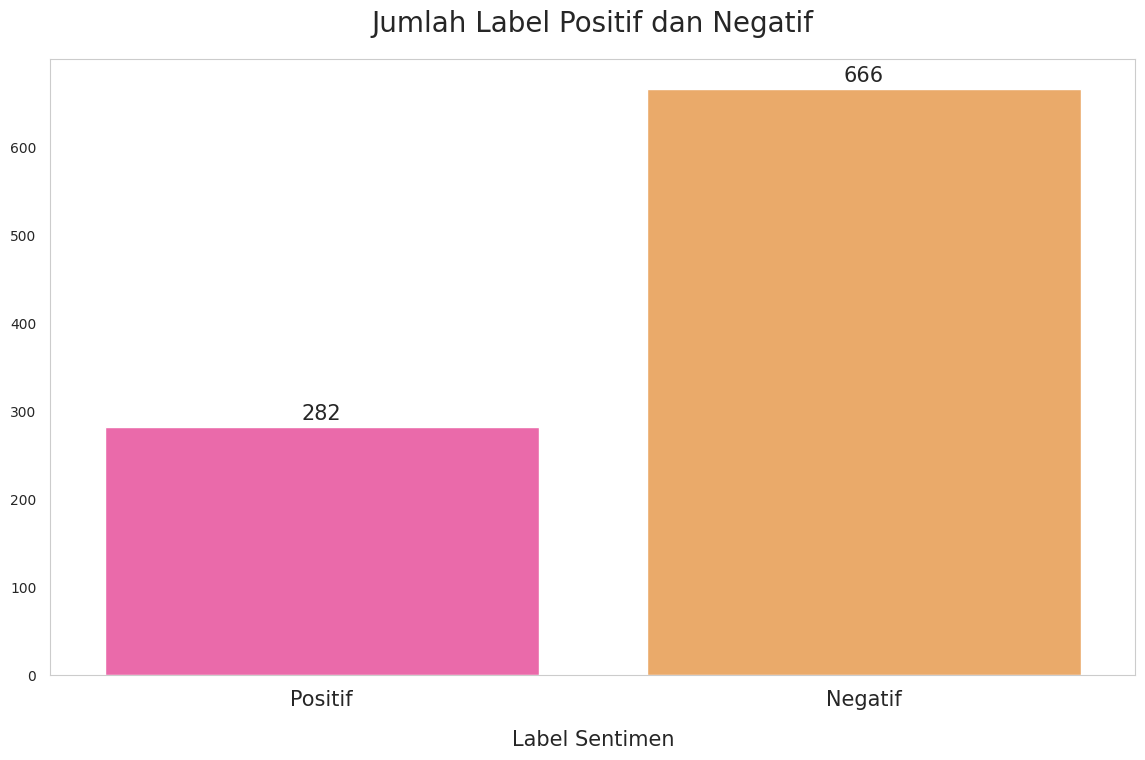

In [128]:
# membuat visualisasi bar chart untuk menampilkan jumlah sentimen positif dan negatif
fig, ax = plt.subplots(figsize=(14,8))
ax = sns.countplot(x='polarity', data=data_final, palette="spring")

for rect in ax.patches:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2,
            height + 8,
            f"{int(height)}",
            ha='center', fontsize=15)

plt.title("Jumlah Label Positif dan Negatif", fontsize=20, pad=20)
plt.xlabel("Label Sentimen", fontsize=15, labelpad=15)
plt.ylabel("")
plt.ylim(0)

ax.grid(False)
ax.set_xticklabels(["Positif", "Negatif"], fontsize=15)
ax.tick_params(axis='both', length=0, pad=10)
plt.show()

## Data Exploration

In [129]:
review_all = []

for review in data_final['stem_review']:
  text = review.split()
  for token_review in text:
    print(token_review)
    review_all.append(token_review)

video
bpom
masyarakat
aktif
awas
edar
skincare
ilegal
masyarakat
suruh
ningkatin
sadar
kerja
bpom
skalian
skincare
bahaya
jual
bebas
pasar
rugi
bayar
pajak
cerita
maksimal
awas
produk
skincare
kashuri
sila
masyarakat
lapor
produk
sesuai
tentu
halo
bpom
aplikasi
kashuri
bpom
uji
sampling
produk
salah
topik
bahas
upaya
wujud
kolaborasi
lintas
sektor
kait
bina
awas
daya
masyarakat
tindak
tega
hukum
edar
skincare
etiket
biru
sesuai
tentu
hai
dear
bumil
gaberani
pakai
skincare
takut
pengaruh
kandung
tenaang
buund
drwskincare
aman
nyaman
hamil
susu
drw
lulus
bpom
pakai
bawah
awas
dokter
damping
baca
anggota
komisi
ix
dpr
ri
nurhadi
sorot
marak
iklan
edar
produk
cantik
skincare
sertifikasi
ilegal
awas
badan
awas
obat
makan
bpom
mang
bijak
sektor
legislator
marak
skincare
ilegal
nurhadi
awas
bpom
pabrik
skincare
ilegal
operasi
rumah
mewah
ciputat
timur
tangerang
selatan
tangsel
gerebek
badan
awas
obat
makan
republik
indonesia
bpom
ri
rabu
bpom
colong
skincare
mercury
hq
obat
sebab
gagal
ginjal

In [130]:
# menampilkan kata dengan jumlah kemunculan yang paling dibahas oleh pengguna
freq_dist = FreqDist(review_all)
print("Banyak sampel distribusi frekuensi:")
freq_dist

Banyak sampel distribusi frekuensi:


FreqDist({'skincare': 1130, 'bpom': 790, 'produk': 407, 'bahaya': 294, 'overclaim': 273, 'mafia': 195, 'lokal': 162, 'ilegal': 154, 'pakai': 149, 'kandung': 141, ...})

In [131]:
# menampilkan 500 kata yang paling sering muncul
common_review = freq_dist.most_common(500)
print(common_review)

[('skincare', 1130), ('bpom', 790), ('produk', 407), ('bahaya', 294), ('overclaim', 273), ('mafia', 195), ('lokal', 162), ('ilegal', 154), ('pakai', 149), ('kandung', 141), ('kosmetik', 137), ('aman', 105), ('bahan', 102), ('brand', 95), ('usut', 85), ('orang', 84), ('beli', 82), ('edar', 80), ('abal', 77), ('jual', 74), ('awas', 73), ('daftar', 69), ('dokter', 67), ('obat', 65), ('doktif', 65), ('kulit', 61), ('gue', 59), ('lolos', 59), ('temu', 58), ('harga', 55), ('kayak', 54), ('indonesia', 52), ('sita', 52), ('palsu', 51), ('etiket', 50), ('biru', 50), ('izin', 49), ('ri', 48), ('merkuri', 46), ('berantas', 46), ('cek', 45), ('review', 43), ('makan', 42), ('bisnis', 42), ('cocok', 42), ('korea', 41), ('deh', 40), ('kait', 39), ('hasil', 39), ('sesuai', 38), ('hukum', 38), ('pabrik', 38), ('bukti', 38), ('masyarakat', 37), ('salah', 36), ('badan', 36), ('jaring', 36), ('uji', 35), ('tindak', 35), ('bagus', 35), ('diam', 34), ('murah', 32), ('owner', 29), ('usaha', 29), ('mahal', 29

### Wordcloud Frekuensi Kata

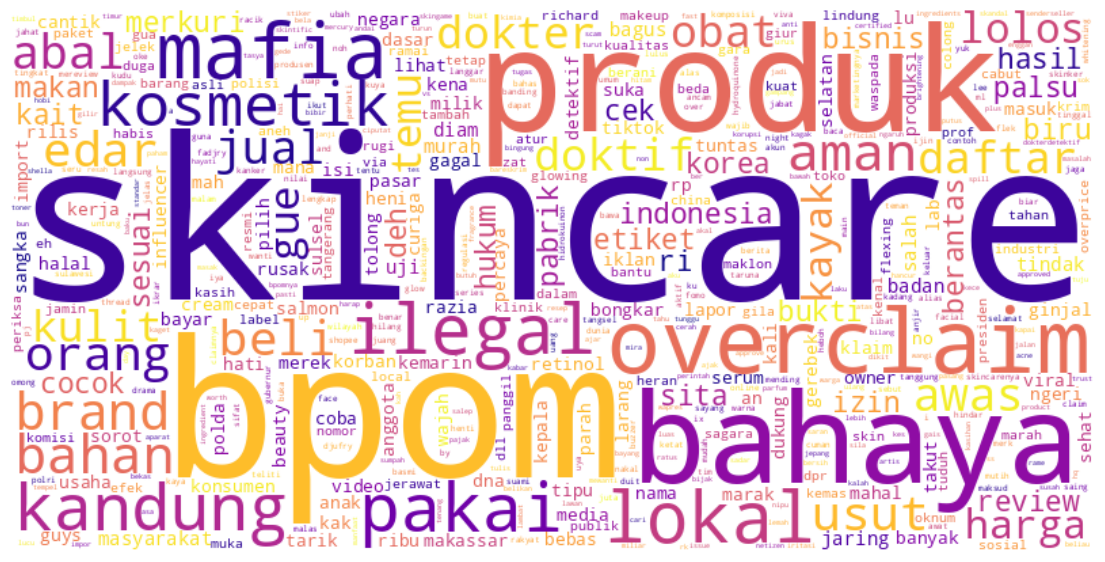

In [132]:
# membuat visualisasi WordCloud
w_cloud = WordCloud(background_color="white",
                    width=800, height=400, max_font_size=200,
                    max_words=500, colormap='plasma',
                    contour_width=2).generate_from_frequencies(freq_dist)

plt.figure(figsize=(14,8))
plt.imshow(w_cloud, interpolation="bilinear")
plt.axis("off")
plt.show()

### Barplot Distribusi Kata

In [133]:
# memasukkan 500 sampel kata beserta jumlah kemunculan ke dalam dataframe
most_freq_df = pd.DataFrame(common_review, columns=['words','count'])
most_freq_df.sort_values(by='count', ascending=False)

,words,count
0,skincare,1130
1,bpom,790
2,produk,407
3,bahaya,294
4,overclaim,273
...,...,...
479,seller,5
496,turut,5
497,tes,5
498,susah,5


In [134]:
# mengurutkan kata sampel berdasarkan jumlah kemunculan yang diurutkan secara descending
# kemudian mengambil 15 kata sampel
most_freq_df.sort_values(by='count', ascending=False)
top15 = most_freq_df.iloc[:15]

/tmp/ipython-input-135-2132718409.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='words', y='count', data=top15, palette='viridis')


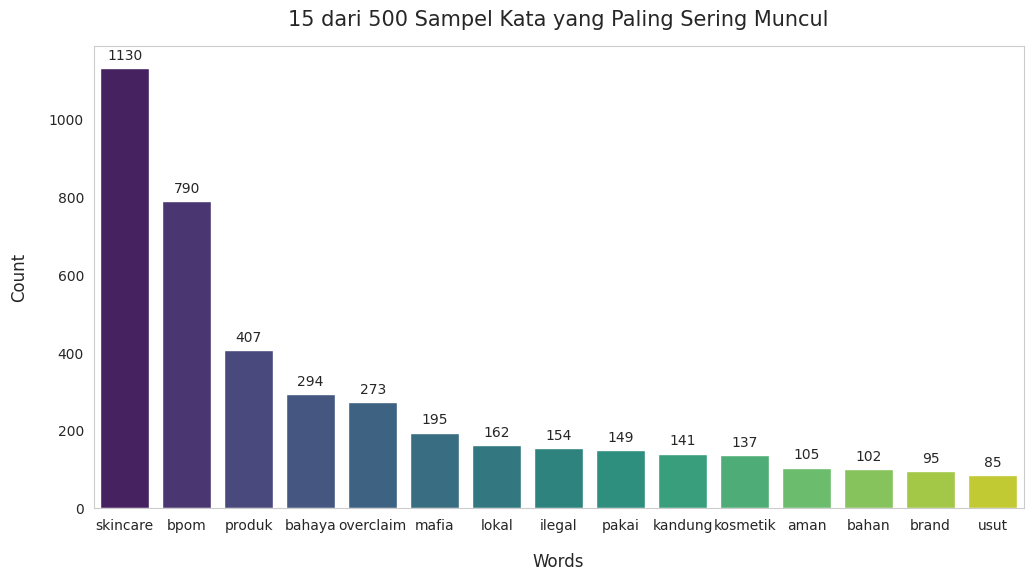

In [135]:
# membuat visualisasi 15 sampel kata yang paling sering dibicarakan oleh pengguna
plt.figure(figsize=(12,6))
sns.set_style('whitegrid')

ax = sns.barplot(x='words', y='count', data=top15, palette='viridis')
for annotate in ax.patches:
  height = annotate.get_height()
  ax.annotate(f"{int(height)}",
              (annotate.get_x() + annotate.get_width()/2.,
               annotate.get_height()), ha = 'center', va='center', xytext=(0,9),
               textcoords = 'offset points')
plt.title("15 dari 500 Sampel Kata yang Paling Sering Muncul", fontsize=15, pad=15)
plt.xlabel('Words', fontsize=12, labelpad=15)
plt.ylabel('Count', fontsize=12, labelpad=15)
ax.grid(False)
plt.show()

In [136]:
# mengonversikan sentimen menjadi 1 untuk positif dan -1 untuk negatif
polarity = []
for convert in data_final['polarity']:
  if convert == "positif":
    num_polarity = 1
  else:
    num_polarity = -1

  polarity.append(num_polarity)
data_final['polarity'] = polarity

In [137]:
data_final['polarity']

,polarity
0,1
1,-1
2,1
3,-1
4,1
...,...
943,1
944,-1
945,1
946,-1


In [138]:
data_final.polarity.value_counts()

,count
polarity,
-1,666
1,282


In [139]:
train_pct_pos = data_final.polarity.value_counts()[1]/data_final.polarity.value_counts().sum()*100
print("Persentase sentimen positif:", round(train_pct_pos,2), '%')

train_pct_neg = data_final.polarity.value_counts()[-1]/data_final.polarity.value_counts().sum()*100
print("Persentase sentimen negatif:", round(train_pct_neg,2), '%')

Persentase sentimen positif: 29.75 %
Persentase sentimen negatif: 70.25 %


### Wordcloud Sentimen Positif

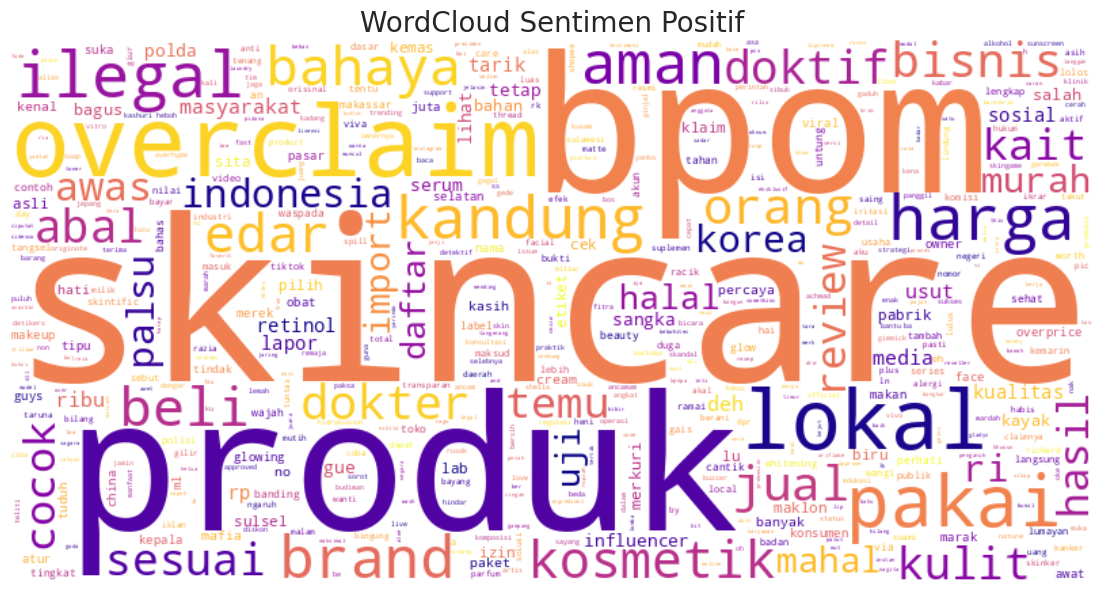

In [140]:
review_all_pos = []

for review in data_final[data_final['polarity'] == 1]['stem_review']:
    text = review.split()
    for token_review in text:
        review_all_pos.append(token_review)

freq_dist_pos = FreqDist(review_all_pos)
w_cloud_pos = WordCloud(background_color="white",
                        width=800, height=400,
                        max_font_size=200, max_words=500,
                        colormap='plasma',
                        contour_width=2).generate_from_frequencies(freq_dist_pos)

plt.figure(figsize=(14, 8))
plt.imshow(w_cloud_pos, interpolation="bilinear")
plt.axis("off")
plt.title("WordCloud Sentimen Positif", fontsize=20)
plt.show()

### Wordcloud Sentimen Negatif

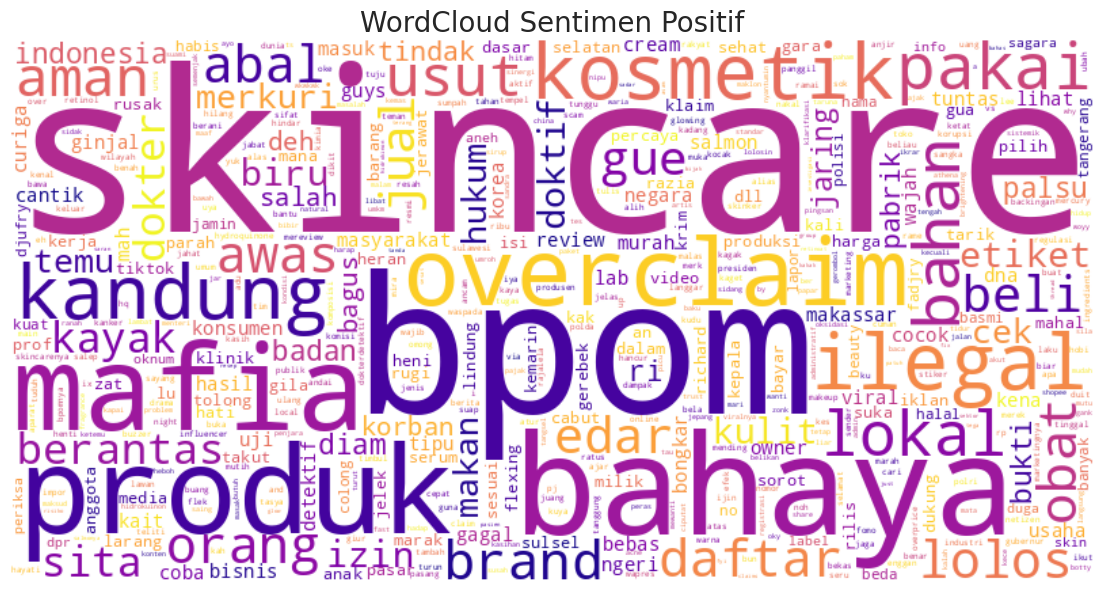

In [141]:
review_all_neg = []

for review in data_final[data_final['polarity'] == -1]['stem_review']:
    text = review.split()
    for token_review in text:
        review_all_neg.append(token_review)

freq_dist_neg = FreqDist(review_all_neg)
w_cloud_pos = WordCloud(background_color="white",
                        width=800, height=400,
                        max_font_size=200, max_words=500,
                        colormap='plasma',
                        contour_width=2).generate_from_frequencies(freq_dist_neg)

plt.figure(figsize=(14, 8))
plt.imshow(w_cloud_pos, interpolation="bilinear")
plt.axis("off")
plt.title("WordCloud Sentimen Positif", fontsize=20)
plt.show()

In [142]:
data_final = data_final.replace('',np.nan, regex=True)

In [143]:
data_final = data_final.dropna()

In [144]:
data_final = data_final.reset_index(drop=True)

## Ekspor Data

In [145]:
data_final.to_csv('/content/data_labeling.csv', index=False)